
# SVM Tutorial
This is adapted from scikit learn docs [here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py). All rights belong to the scikit organization and the author of the code.

We will use our old Iris dataset itself. The idea will be to see the power that kernels provide us. 

In [2]:
# Import all the important libraries
import numpy as np
import matplotlib.pyplot as plt
# Notice that sklearn.svm holds the SVM implementation
from sklearn import datasets, svm

In [3]:
# Load the data into variables called X, y
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

Whenever we are coding, it is good practice to print the dimensions of the data, just for a sanity check. If the data is small, you could also print it out entirely
just to see what you're dealing with. Of course, the best method is to plot the data.

In [12]:
print(X.shape)
print(y.shape)
print(y)

(100, 2)
(100,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


When testing algorithms, it is important to keep aside some data to test on. Otherwise, we have no way to understand how our model performed in real life. 

In [4]:
# Randomly permute the dataset
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

# Assign the first 90 samples as Training, the rest as Testing
X_train = X[:90]
y_train = y[:90]
X_test = X[90:]
y_test = y[90:]

Let's plot the entire datasets for our visualization purposes. Do note that we use only 2 dimensions of the dataset. 

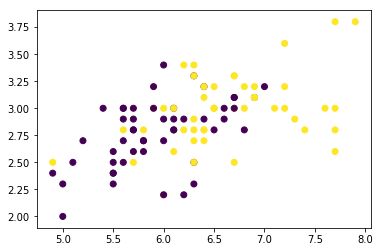

In [5]:
# Plot the entire data
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

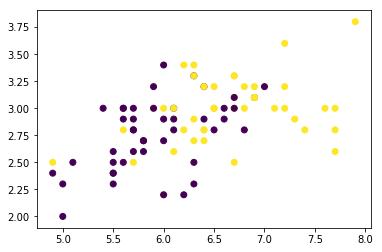

In [6]:
# Plot the training dataset
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

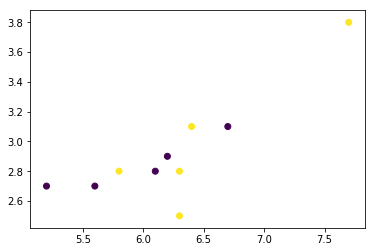

In [7]:
# Plot the testing dataset
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

We can now use sklearn's classifier to fit onto our data. After that, we will plot the entire decision surface.

In [14]:
# fit the model
fig_num = 1
# We can use 'linear', 'rbf', or 'poly' for different kernels
kernel = 'linear'
# Create the classifier, as a SVC, with kernel given by our choice above. The value of gamma is a "hyper parameter", please refer to the sklearn documentation for details.
clf = svm.SVC(kernel=kernel, gamma=10)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

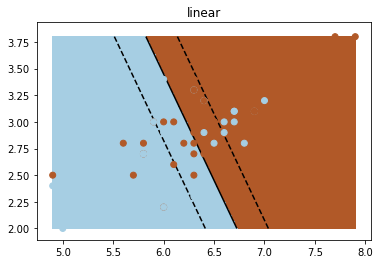

In [15]:
plt.figure(fig_num)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.title(kernel)
plt.show()